# **1. Introduction**

Le projet vise à comparer les visages détectés dans quatres images afin d'identifier les visages similaires. Cette tâche est essentielle dans des applications telles que la reconnaissance faciale, la sécurité, et l'analyse de photographie. Pour ce faire, nous avons utilisé des techniques de détection de visages et de comparaison de caractéristiques faciales.

# **2. Motivation**
La motivation derrière ce travail est de développer une méthode efficace pour comparer des visages entre deux images, ce qui peut être appliqué dans divers domaines comme

# **3. Préparation de l'environnement**

**3.1. Installation des Bibliothèques Nécessaires**

Nous avons installé les bibliothèques nécessaires pour la détection des visage.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importation
import cv2
from google.colab.patches import cv2_imshow

**Nous avons chargé nos images dans notre espace de travailler.**

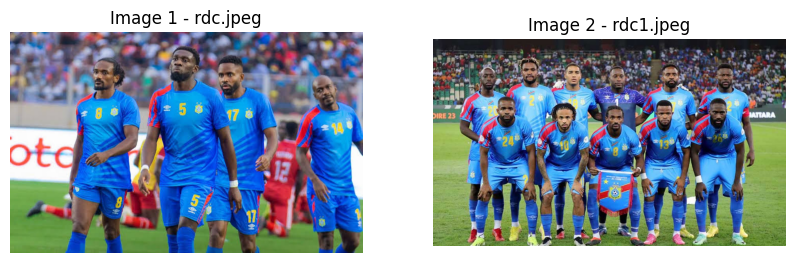

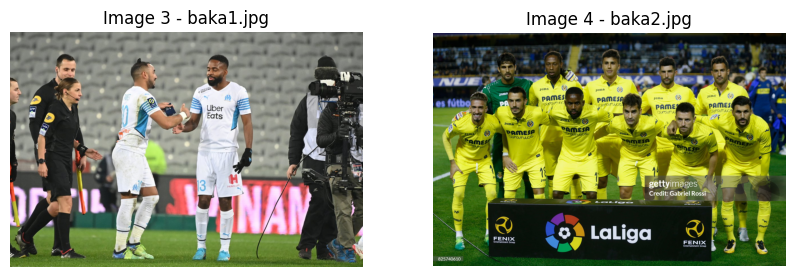

In [5]:
# Importer les bibliothèques nécessaires
import cv2
import matplotlib.pyplot as plt

# Charger les images
image1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg")
image2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg")
image3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka1.jpg")
image4 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka2.jpg")

# Convertir les images en RGB pour l'affichage avec Matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Afficher les images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.title("Image 1 - rdc.jpeg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image2_rgb)
plt.title("Image 2 - rdc1.jpeg")
plt.axis("off")

# Afficher les images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image3_rgb)
plt.title("Image 3 - baka1.jpg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image4_rgb)
plt.title("Image 4 - baka2.jpg")
plt.axis("off")
plt.show()

# **4. Charger le modèle de détection des visages**

In [6]:
# Télécharger le fichier Haar Cascade (si non déjà disponible)
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml

# Charger le classifieur Haar Cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Vérifier si le classifieur a été chargé
if face_cascade.empty():
    print("Erreur : Classifieur non chargé.")
else:
    print("Classifieur chargé avec succès.")

--2024-12-24 18:45:44--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2024-12-24 18:45:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

20

# **5. Détection des visages**

Nous avons utilisé le modèle MTCNN (Multi-task Cascaded Convolutional Networks) pour détecter et extraire les visages des deux images. Ce modèle est bien adapté pour la détection de visages en raison de sa précision et de sa capacité à détecter des visages dans diverses conditions.

In [7]:
!pip install mtcnn

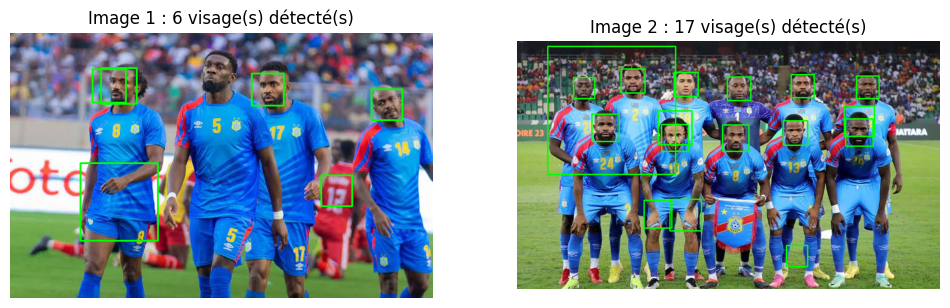

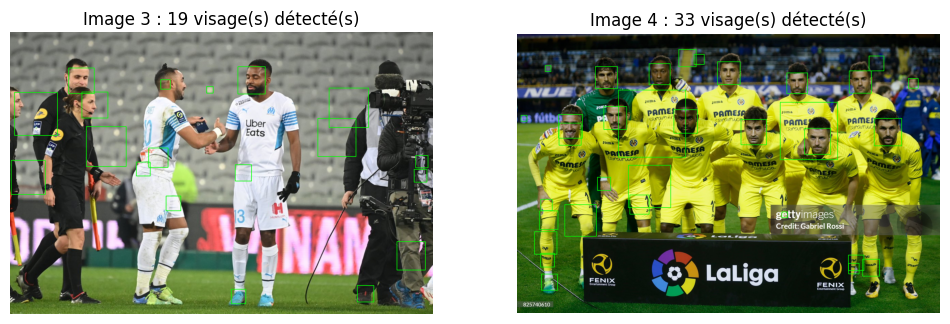

In [8]:
# !pip install mtcnn

from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Charger le détecteur de visages Haar
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Charger les images
image1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg")  # Remplacez par le chemin réel
image2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg")  # Remplacez par le chemin réel
image3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka1.jpg")
image4 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka2.jpg")

# Vérifier que les images sont bien chargées
if image1 is None or image2 is None:
    raise FileNotFoundError("Erreur : L'une des images n'a pas pu être chargée. Vérifiez les chemins des fichiers.")

# Fonction ajustée pour détecter les visages
def detect_faces(image, cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20)):
    """
    Détecte les visages dans une image et dessine des rectangles autour des visages détectés.

    Args:
    - image : Image d'entrée.
    - cascade : Classifieur Haar pour la détection de visages.
    - scaleFactor : Paramètre pour l'échelle pyramidale.
    - minNeighbors : Nombre minimum de voisins requis pour retenir une détection.
    - minSize : Taille minimale d'un visage à détecter.

    Returns:
    - image avec rectangles autour des visages.
    - Liste des coordonnées des visages détectés.
    """
    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Détecter les visages avec les paramètres ajustés
    faces = cascade.detectMultiScale(
        gray_image,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=minSize
    )

    # Dessiner des rectangles autour des visages détectés
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Rectangle vert

    return image, faces

# Détecter les visages dans les deux images
image1_faces, faces1 = detect_faces(image1.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
image2_faces, faces2 = detect_faces(image2.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
image3_faces, faces3 = detect_faces(image3.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))
image4_faces, faces4 = detect_faces(image4.copy(), face_cascade, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20))

# Convertir en RGB pour l'affichage avec Matplotlib
image1_faces_rgb = cv2.cvtColor(image1_faces, cv2.COLOR_BGR2RGB)
image2_faces_rgb = cv2.cvtColor(image2_faces, cv2.COLOR_BGR2RGB)
image3_faces_rgb = cv2.cvtColor(image3_faces, cv2.COLOR_BGR2RGB)
image4_faces_rgb = cv2.cvtColor(image4_faces, cv2.COLOR_BGR2RGB)

# Afficher les résultats
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image1_faces_rgb)
plt.title(f"Image 1 : {len(faces1)} visage(s) détecté(s)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image2_faces_rgb)
plt.title(f"Image 2 : {len(faces2)} visage(s) détecté(s)")
plt.axis("off")

# Afficher les résultats
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image3_faces_rgb)
plt.title(f"Image 3 : {len(faces3)} visage(s) détecté(s)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(image4_faces_rgb)
plt.title(f"Image 4 : {len(faces4)} visage(s) détecté(s)")
plt.axis("off")
plt.show()


Nous avons constatés pendant la détection des visages, des erreurs fréquentes qu'on rencontre souvent dans l'apprentissage la faible capacité d'optimisation du départ tels que des faux positifs (détections erronées) ou des détections multiples du même visage. Pour améliorer la précision et la fiabilité de la détection, certaines stratégies d'optimisation peuvent être appliquées, comme la réduction de faux positifs en augmentant les paramètres **minNeighbors**, Ce paramètre contrôle le nombre de voisins qu'un rectangle candidat doit avoir pour être retenu comme visage, nous devons aussi :

- Utiliser un classificateur plus robuste

- Suppression des Chevauchements



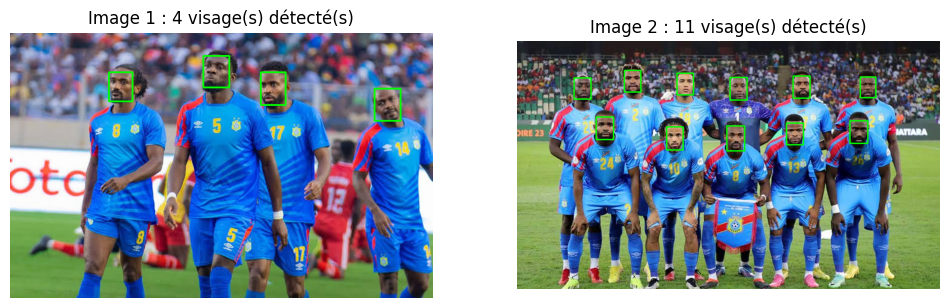

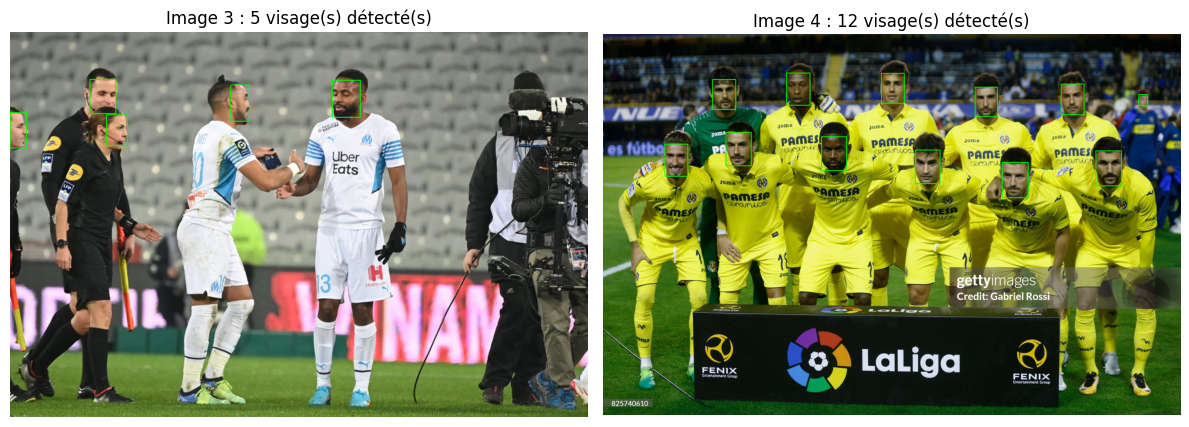

In [9]:
# Fonction pour détecter et dessiner des visages tout en conservant les couleurs
def detect_and_draw_faces(image_path):
    # Lire l'image
    image = cv2.imread(image_path)  # Lire en BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour affichage et MTCNN
    image_copy = image_rgb.copy()  # Faire une copie pour dessiner sans altérer l'original

    # Initialiser le détecteur MTCNN
    detector = MTCNN()

    # Détection des visages
    faces = detector.detect_faces(image_rgb)

    # Dessiner des rectangles autour des visages détectés
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Rectangle vert

    return image_copy, len(faces)

# Chemins des deux images
image_path1 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg"  # Remplacez avec votre chemin
image_path2 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg"  # Remplacez avec le chemin de la deuxième image
image_path3 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka1.jpg"  # Remplacez avec votre chemin
image_path4 = "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka2.jpg"  # Remplacez avec le chemin de la deuxième image


# Appliquer la fonction sur les deux images
image1_with_faces, faces_count1 = detect_and_draw_faces(image_path1)
image2_with_faces, faces_count2 = detect_and_draw_faces(image_path2)
image3_with_faces, faces_count3 = detect_and_draw_faces(image_path3)
image4_with_faces, faces_count4 = detect_and_draw_faces(image_path4)

# Afficher les deux images côte à côte
plt.figure(figsize=(12, 6))

# Image 1
plt.subplot(1, 2, 1)
plt.imshow(image1_with_faces)
plt.axis("off")
plt.title(f"Image 1 : {faces_count1} visage(s) détecté(s)")

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(image2_with_faces)
plt.axis("off")
plt.title(f"Image 2 : {faces_count2} visage(s) détecté(s)")

plt.figure(figsize=(12, 6))
# Image 1
plt.subplot(1, 2, 1)
plt.imshow(image3_with_faces)
plt.axis("off")
plt.title(f"Image 3 : {faces_count3} visage(s) détecté(s)")

# Image 2
plt.subplot(1, 2, 2)
plt.imshow(image4_with_faces)
plt.axis("off")
plt.title(f"Image 4 : {faces_count4} visage(s) détecté(s)")

plt.tight_layout()
plt.show()

Après optimisation, nous avions constatés une nette détection des visages sur toutes nos images.

# **5. Liste des visages**

Nous avons également listé les visages similaires

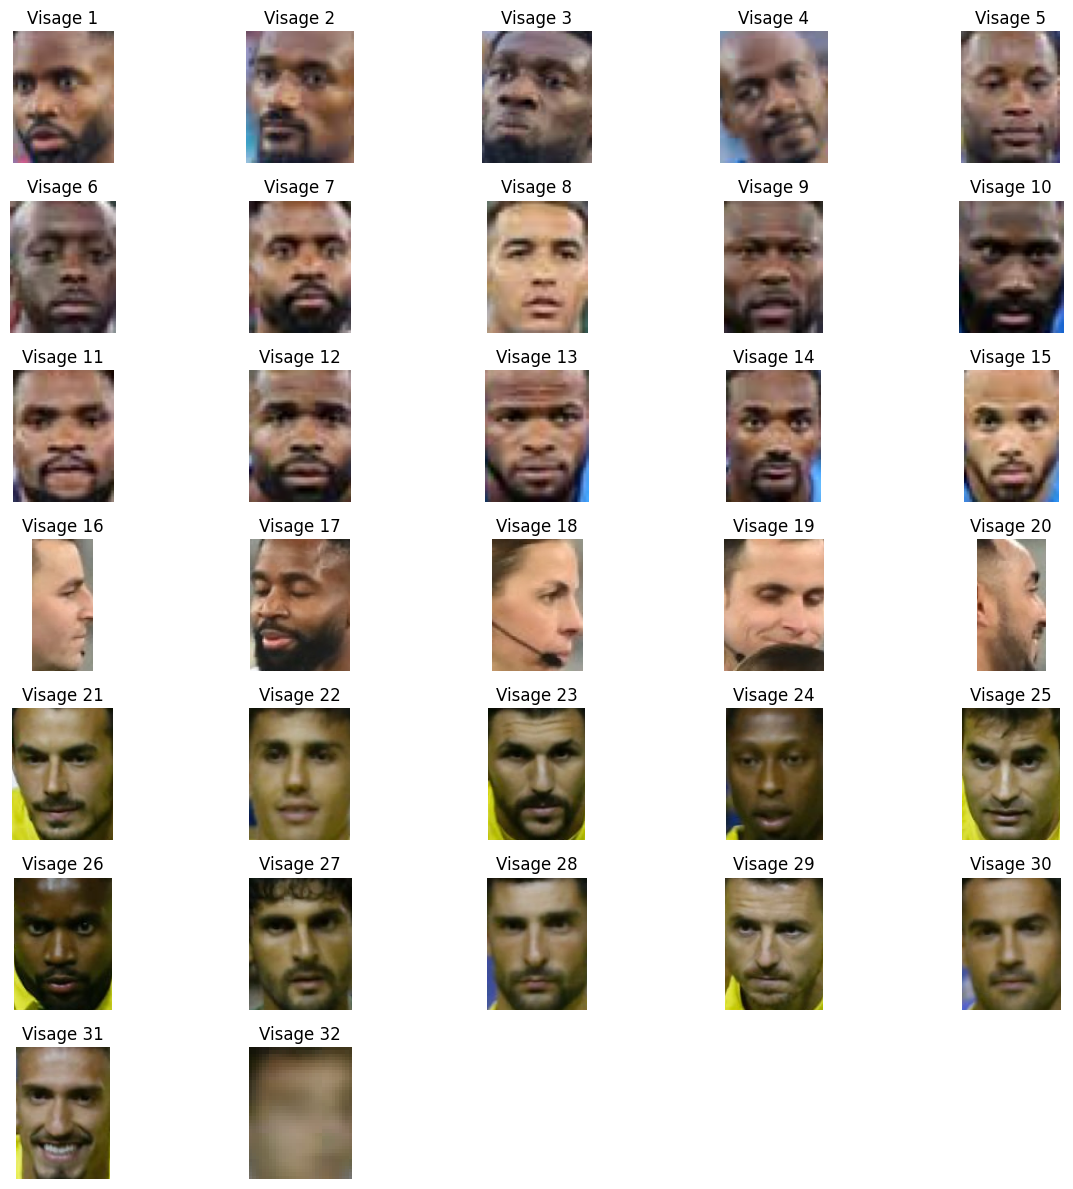

Image 1 : 4 visage(s) détecté(s)
 - Visage 1
 - Visage 2
 - Visage 3
 - Visage 4
Image 2 : 11 visage(s) détecté(s)
 - Visage 1
 - Visage 2
 - Visage 3
 - Visage 4
 - Visage 5
 - Visage 6
 - Visage 7
 - Visage 8
 - Visage 9
 - Visage 10
 - Visage 11
Image 3 : 5 visage(s) détecté(s)
 - Visage 1
 - Visage 2
 - Visage 3
 - Visage 4
 - Visage 5
Image 4 : 12 visage(s) détecté(s)
 - Visage 1
 - Visage 2
 - Visage 3
 - Visage 4
 - Visage 5
 - Visage 6
 - Visage 7
 - Visage 8
 - Visage 9
 - Visage 10
 - Visage 11
 - Visage 12


In [10]:
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Fonction pour détecter et dessiner des visages tout en conservant les couleurs
def detect_and_extract_faces(image_path):
    # Lire l'image
    image = cv2.imread(image_path)  # Lire en BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour affichage et MTCNN
    image_copy = image_rgb.copy()  # Faire une copie pour dessiner sans altérer l'original

    # Initialiser le détecteur MTCNN
    detector = MTCNN()

    # Détection des visages
    faces = detector.detect_faces(image_rgb)

    # Liste pour stocker les visages extraits
    extracted_faces = []

    # Dessiner des rectangles autour des visages détectés et extraire les visages
    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Rectangle vert
        face_img = image_rgb[y:y+height, x:x+width]  # Extraire le visage
        extracted_faces.append(face_img)

    return image_copy, extracted_faces

# Chemins des images
image_paths = [
    "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc.jpeg",
    "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/rdc2.jpeg",
    "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka1.jpg",
    "/content/drive/MyDrive/Colab Notebooks/Knowledge/Reconnaissance de visa/dataset/baka2.jpg"
]

# Détecter les visages et les extraire pour chaque image
results = [detect_and_extract_faces(image_path) for image_path in image_paths]

import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# ... (rest of the code remains the same) ...

# Afficher les visages extraits
plt.figure(figsize=(12, 12))
face_idx = 1
# Calculate the total number of subplots needed:
total_faces = sum(len(extracted_faces) for _, extracted_faces in results)
# Calculate rows and columns needed:
rows = (total_faces + 4) // 5  # Ensure enough rows to display all faces

for _, extracted_faces in results:
    for face in extracted_faces:
        plt.subplot(rows, 5, face_idx) # Adjusted subplot grid
        plt.imshow(face)
        plt.axis("off")
        plt.title(f"Visage {face_idx}")
        face_idx += 1
plt.tight_layout()
plt.show()

# Lister les visages
for idx, (_, extracted_faces) in enumerate(results):
    print(f"Image {idx + 1} : {len(extracted_faces)} visage(s) détecté(s)")
    for face_idx, face in enumerate(extracted_faces):
        print(f" - Visage {face_idx + 1}")

# **Conclusion**
En appliquant ces stratégies d'optimisation, nous pouvons améliorer la précision et réduire les erreurs lors de la détection des visages. Ces améliorations sont cruciales pour des applications nécessitant une reconnaissance faciale fiable et précise.